## Chromosome chunks heatmap

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline 

In [191]:
file = '/home/labs/dnalab/share/lims/R/gcat-cleaning-data/data/chr_position_score.txt'
chunks = pd.read_csv(file, sep=' ')
chunks[chunks.score > 0]

,low_bound,up_bound,chr,score,log_score
2,10893469,15963842,1,1,0.693147
58,45600844,50663277,2,9,2.302585
111,71068766,76139826,3,1,0.693147
122,126850437,131921497,3,67,4.219508
138,10119412,15141530,4,4,1.609438
202,140545737,145564790,5,1,0.693147
220,50378631,55399954,6,1,0.693147
232,110634519,115655842,6,1,0.693147
235,125698491,130719814,6,1,0.693147
249,25702640,30834180,7,1,0.693147


In [69]:
# Normalize data columns
chunks['value'] = chunks.log_score
#chunks['value'] = (chunks.log_score - chunks.log_score.mean()) / (chunks.log_score.max() - chunks.log_score.min())
chunks_sort = chunks
# Sort data according to Points, lowest to highest
# This was just a design choice made by Yau
#chunks_sort = chunks_norm.sort_values(by='value')
df = chunks_sort.copy()

In [70]:
df['num'] = df.index
for chr_act in range(1, 23):
     df.ix[df.chr == chr_act, 'chunk'] = df[df.chr > chr_act - 1].num - df[df.chr > chr_act - 1].index[0] + 1
        
chunks_sort = df.copy()

In [71]:
chunks = int(chunks_sort.chunk.max())
chrs = int(chunks_sort.chr.max())

mx = [[0 for y in range(chunks)] for x in range(chrs)]
df = chunks_sort.copy()

In [72]:
for index, row in df.iterrows():
    mx[int(row['chr']-1)][int(row['chunk']-1)] = row['value']
    
mx = pd.DataFrame(mx)
mx.columns = np.arange(1, chunks + 1)

In [73]:
file = '/home/labs/dnalab/share/lims/R/gcat-cleaning-data/data/chr_position_score_heatmap.csv'
mx.to_csv(file, index=False)

In [74]:
file = '/home/labs/dnalab/share/lims/R/gcat-cleaning-data/data/chr_position_score_heatmap.csv'
mx = pd.read_csv(file)

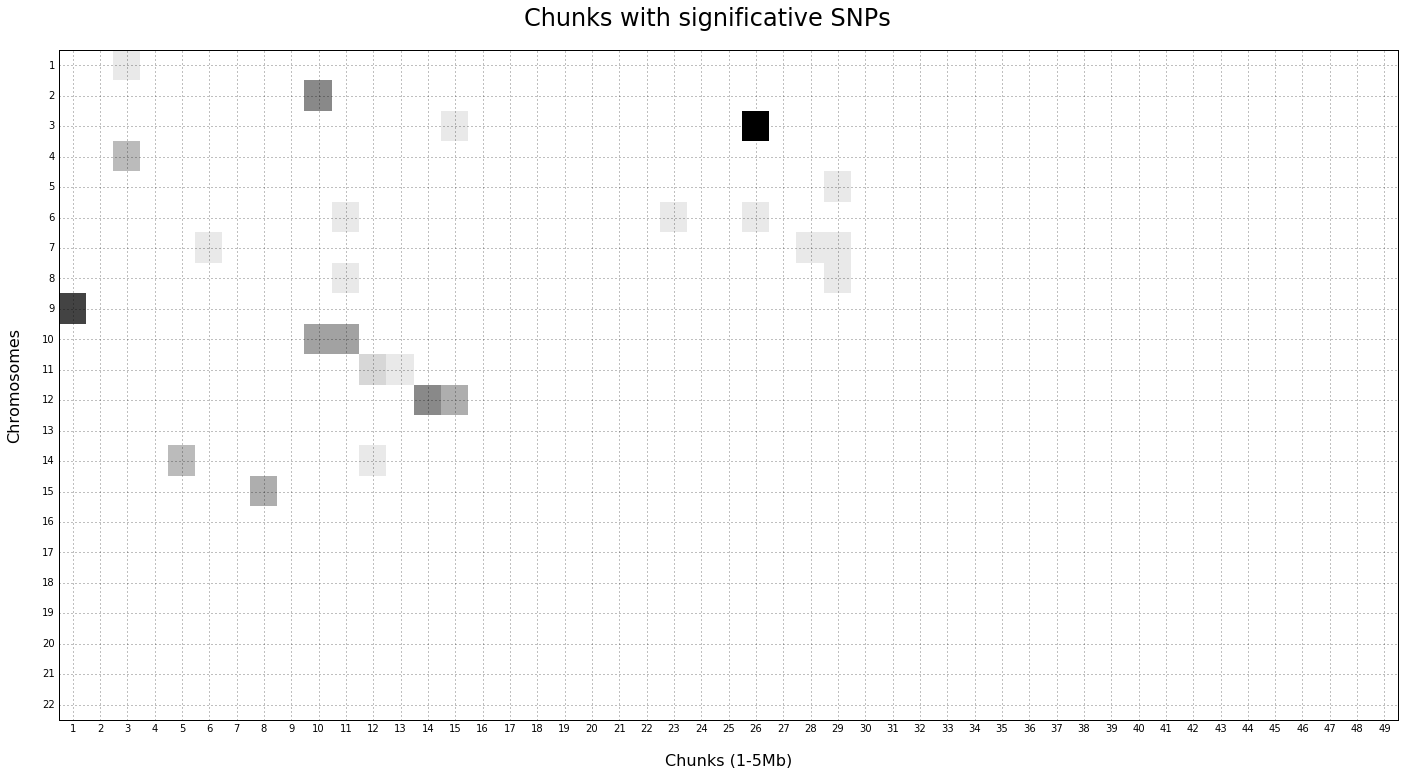

In [186]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(mx, cmap=plt.cm.Greys)

fig = plt.gcf()
fig.set_size_inches(24,12)

# turn off the frame
ax.set_frame_on(True)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(mx.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(mx.shape[1]) + 0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
#ax.xaxis.tick_top()

ax.set_xticklabels(mx.columns, minor=False)
ax.set_yticklabels(mx.index + 1, minor=False)

ax.set_ylim((22.0, 0.0))
ax.set_xlim((0.0, 49.0))

ax.set_xlabel('Chunks (1-5Mb)', fontsize=16, labelpad=20)
ax.set_ylabel('Chromosomes', fontsize=16, labelpad=20)

ax.grid(True)

# Turn off all the ticks
ax = plt.gca()

plt.suptitle('Chunks with significative SNPs', fontsize = 24, y=0.95)

for t in ax.xaxis.get_major_ticks(): 
    t.tick1On = False 
    t.tick2On = False 
for t in ax.yaxis.get_major_ticks(): 
    t.tick1On = False 
    t.tick2On = False
    
plt.savefig('figures/chunks.png')
plt.show()